In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error as rmse
from data_generator import postfix, lift, liftDataset

In [64]:
N = 1000    # Number of samples
sigma = 0.01    # Noise variance 
d = 5       # Feature dimension

In [65]:
psfx = postfix(N,d,sigma)       

unliftX = np.load("X"+psfx+".npy")
y = np.load("y"+psfx+".npy")

print("Dataset has n=%d samples, each with d=%d features," % unliftX.shape,"as well as %d labels." % y.shape[0])

Dataset has n=1000 samples, each with d=5 features, as well as 1000 labels.


In [66]:
X = np.array(liftDataset(unliftX))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print("Randomly split dataset to %d training and %d test samples" % (X_train.shape[0],X_test.shape[0]))

Randomly split dataset to 700 training and 300 test samples


In [67]:
fracSize = int(X_train.shape[0]*0.1)
training_rmse = []
test_rmse = []

for i in np.arange(0.1, 1.1, 0.1):
    fracSize = int(X_train.shape[0]*i)
    X_train_frac = X_train[0:fracSize,:]
    y_train_frac = y_train[0:fracSize]

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train_frac, y_train_frac)

    rmse_train = rmse(y_train_frac,model.predict(X_train_frac))
    rmse_test = rmse(y_test,model.predict(X_test))

    training_rmse.append(rmse_train)
    test_rmse.append(rmse_test)

In [68]:
results_df = pd.DataFrame({
    'Fraction %': np.arange(10, 110, 10),
    'Training_RMSE': training_rmse,
    'Test_RMSE': test_rmse
})

results_df

,Fraction %,Training_RMSE,Test_RMSE
0,10,0.007980,0.011920
1,20,0.009054,0.010700
2,30,0.009497,0.010433
3,40,0.009515,0.010376
4,50,0.009724,0.010385
5,60,0.009744,0.010416
6,70,0.009865,0.010438
7,80,0.010012,0.010367
8,90,0.010015,0.010283
9,100,0.009915,0.010269


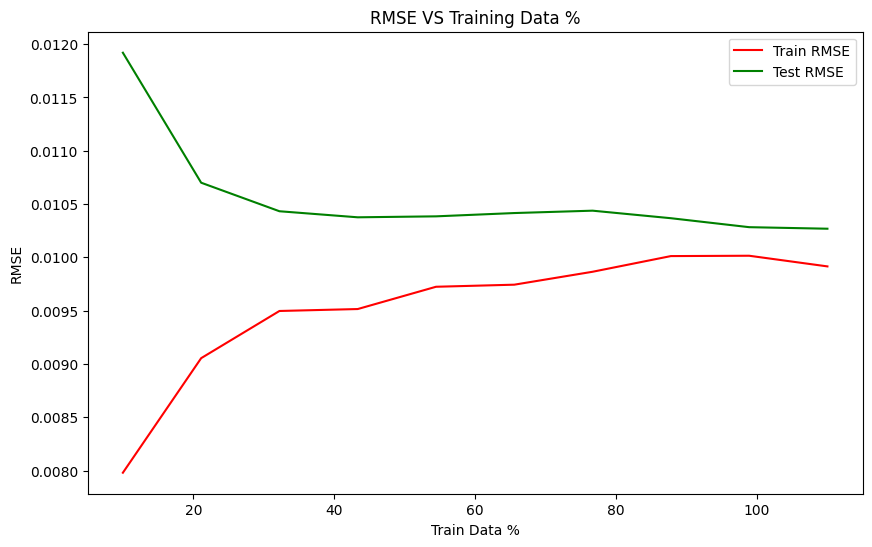

In [69]:
trainDataFraction = np.linspace(10, 110, 10)
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(trainDataFraction, training_rmse, label='Train RMSE', color='red')
plt.plot(trainDataFraction, test_rmse, label='Test RMSE', color='green')

# plt.fill_between(dates[window_size - 1:], upper_band, lower_band, color='lightgray', alpha=0.4, label='Bollinger Bands')
plt.title('RMSE VS Training Data %')
plt.xlabel('Train Data %')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [70]:
for val in model.coef_:
    print(val)

1.9999356138239361
-1.0999590150019678
0.6996756680568659
1.2001482472462324
0.0004378826172674991
0.4001429591559226
1.1666952090093042e-05
-0.00010252285949221131
0.00025488320977353027
-0.0001354170157950739
-0.00030452198632967346
-5.82237320955194e-05
-1.4996662279411348
-0.0007288724676241509
-0.00031356409861272856
0.0006085120013397387
-2.2225406131024266e-05
-0.0003609649238274226
-0.0009760896281174325
-0.7001106248691662


In [71]:
model.intercept_

1.300102736996092